In [7]:
#Step 1: Load Dataset
#Download dataset from Kaggle and load it into Pandas.

import pandas as pd

# Load dataset
df = pd.read_csv("/Users/sripavanyenugu/Downloads/crude-oil-price.csv") 

# Display the first few rows
print(df.head())


                        date  price  percentChange  change
0  1983-03-01 00:00:00+00:00  29.27            NaN     NaN
1  1983-04-01 00:00:00+00:00  30.63          4.646    1.36
2  1983-05-01 00:00:00+00:00  30.25         -1.241   -0.38
3  1983-06-01 00:00:00+00:00  31.38          3.736    1.13
4  1983-07-01 00:00:00+00:00  32.00          1.976    0.62


In [8]:
#Step 2: Basic Data Inspection
#Check the structure and summary of the dataset.

# Check dataset shape (rows, columns)
print(df.shape)

# Display column names
print(df.columns)

# General dataset information (data types, non-null values)
print(df.info())

# Summary statistics
print(df.describe())



(503, 4)
Index(['date', 'price', 'percentChange', 'change'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           503 non-null    object 
 1   price          503 non-null    float64
 2   percentChange  502 non-null    float64
 3   change         502 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB
None
            price  percentChange      change
count  503.000000     502.000000  502.000000
mean    46.508260       0.712861    0.086916
std     28.958285      10.434385    4.943649
min     10.420000     -54.245000  -32.830000
25%     20.460000      -5.292000   -1.735000
50%     33.820000       0.924500    0.260000
75%     69.670000       6.275750    2.377500
max    140.000000      88.376000   16.650000


In [9]:
#Step 3: Handling Missing Values

# Check for missing values
print(df.isnull().sum())

# Fill missing values (example: fill NaN with median value)
df.fillna(df.median(), inplace=True)

# Drop rows with missing values (if necessary)
df.dropna(inplace=True)


date             0
price            0
percentChange    1
change           1
dtype: int64


/var/folders/ql/735g8znn7xb9jzmx4h84zfg40000gn/T/ipykernel_19279/2488984262.py:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [10]:
#Step 4: Duplicates Removal

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Remove duplicates
df.drop_duplicates(inplace=True)



Duplicate rows: 0


In [13]:
#Step 5: Data Type Conversion

# Convert Date column to datetime type
df["date"] = pd.to_datetime(df["date"])

# Ensure numerical columns are properly formatted
df["price"] = pd.to_numeric(df["price"], errors="coerce")


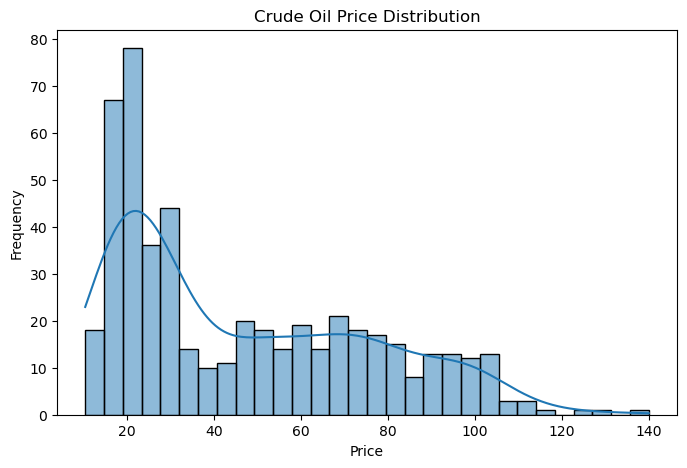

In [14]:
#Step 6: Exploratory Data Analysis (EDA)
#1️⃣ Distribution of Prices

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=30, kde=True)
plt.title("Crude Oil Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


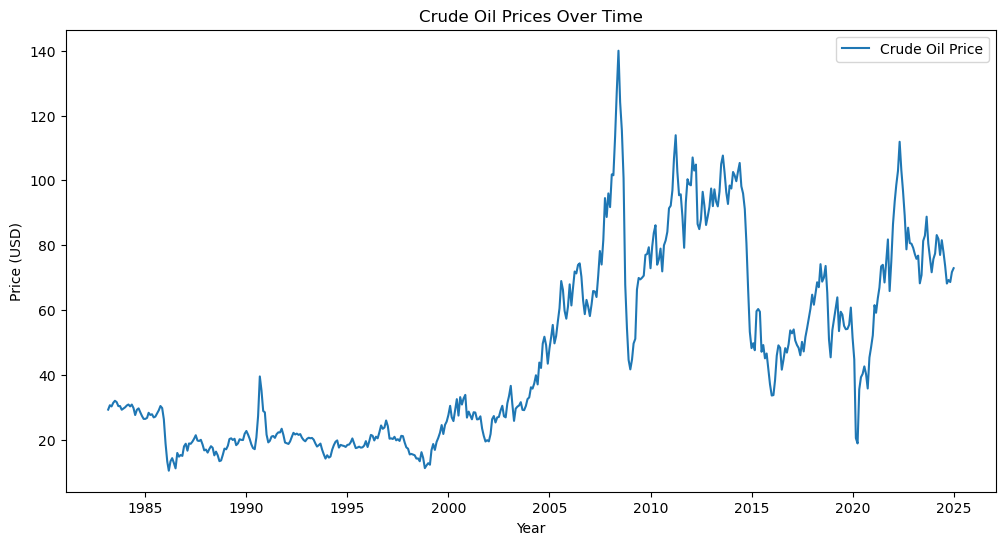

In [16]:
#2️⃣ Time Series Analysis

plt.figure(figsize=(12,6))
plt.plot(df["date"], df["price"], label="Crude Oil Price")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.title("Crude Oil Prices Over Time")
plt.legend()
plt.show()


/var/folders/ql/735g8znn7xb9jzmx4h84zfg40000gn/T/ipykernel_19279/183187781.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


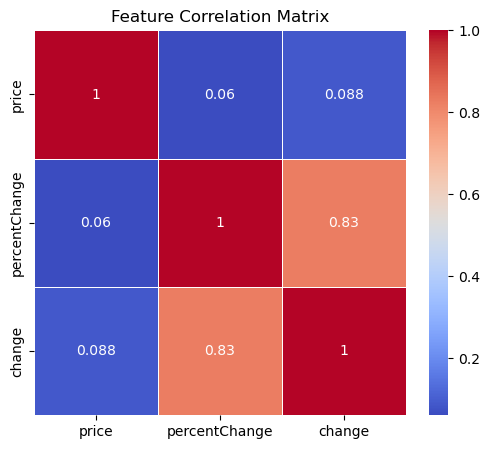

In [17]:
#3️⃣ Checking Correlations

# Compute correlation matrix
corr_matrix = df.corr()

# Heatmap of correlations
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


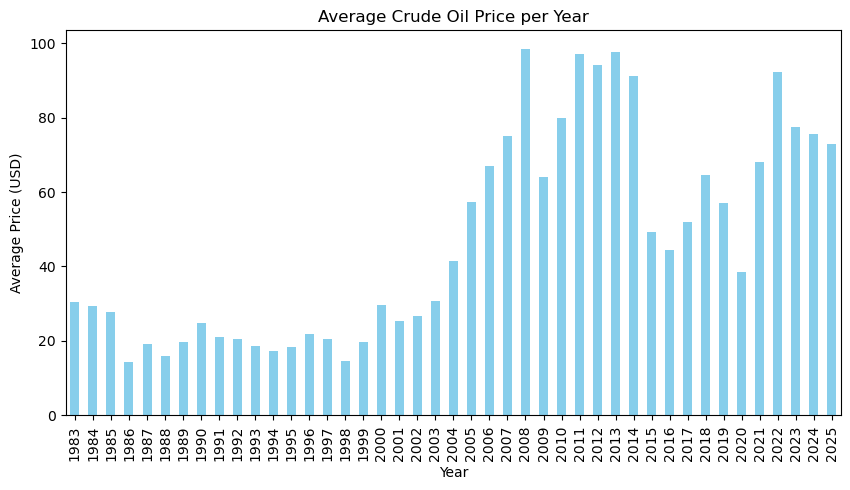

In [19]:
#Step 7: Grouping & Aggregations
#Average Price per Year

df["Year"] = df["date"].dt.year

# Group by Year and calculate mean price
yearly_prices = df.groupby("Year")["price"].mean()

# Plot yearly average prices
plt.figure(figsize=(10,5))
yearly_prices.plot(kind="bar", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.title("Average Crude Oil Price per Year")
plt.show()


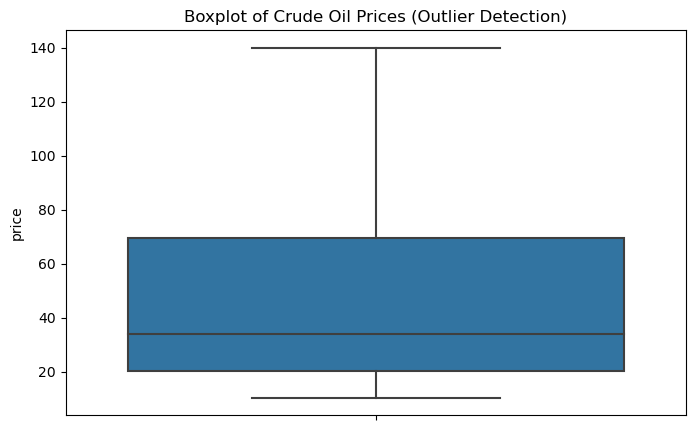

In [22]:
#Step 8: Identifying Outliers

plt.figure(figsize=(8,5))
sns.boxplot(y=df["price"])
plt.title("Boxplot of Crude Oil Prices (Outlier Detection)")
plt.show()


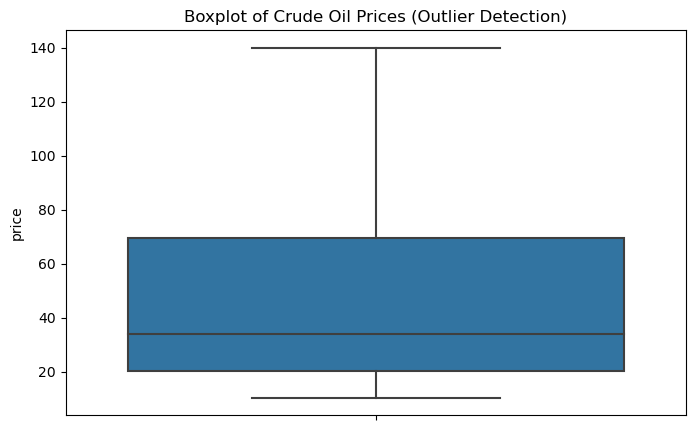

In [24]:
#Step 8: Identifying Outliers

plt.figure(figsize=(8,5))
sns.boxplot(y=df["price"])
plt.title("Boxplot of Crude Oil Prices (Outlier Detection)")
plt.show()
